Build a MMPP model and then fit another model using samples generated from the first model

In [132]:
import sys
import numpy as np
sys.path.append('../../')
import scipy
from scipy.stats import poisson
from rl.mmpp import MMPP
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [162]:
model1 = MMPP(n_components=2)
model1.startprob_ = np.array([.2, .8])
model1.transmat_ = np.array([[0.5, 0.5], [0.01, 0.99]])
model1.emissionrates_ = np.array([1.0, 0.0])
print 'Start: ',
print model1.startprob_
print 'Transitions: '
print model1.transmat_
print 'Emission: ',
print model1.emissionrates_

Start:  [ 0.2  0.8]
Transitions: 
[[ 0.5   0.5 ]
 [ 0.01  0.99]]
Emission:  [ 1.  0.]


In [163]:
model2 = MMPP(n_components=2, n_iter=100, init_params='ste', verbose=True)
model2.emissionrates_ = np.array([0.5, 0.0])

In [164]:
X, Z = model1.sample(1000)
model2.fit(X)
print 'Start: ',
print model2.startprob_
print 'Transitions: '
print model2.transmat_
print 'Emission: ',
print model2.emissionrates_

         1       -1310.7117             +nan
         2        -116.2697       +1194.4420
         3        -113.1085          +3.1612
         4        -111.7045          +1.4041
         5        -110.9857          +0.7187
         6        -110.5391          +0.4466
         7        -110.2053          +0.3338
         8        -109.9165          +0.2889
         9        -109.6417          +0.2747
        10        -109.3666          +0.2752
        11        -109.0838          +0.2827
        12        -108.7897          +0.2941
        13        -108.4818          +0.3079
        14        -108.1584          +0.3234
        15        -107.8179          +0.3405
        16        -107.4589          +0.3590
        17        -107.0796          +0.3792
        18        -106.6784          +0.4012
        19        -106.2533          +0.4251
        20        -105.8022          +0.4512
        21        -105.3225          +0.4797
        22        -104.8115          +0.5110
        23

Start:  [  9.99999988e-01   1.16651398e-08]
Transitions: 
[[ 0.98723832  0.01276168]
 [ 0.67366476  0.32633524]]
Emission:  [  2.41755135e-17   1.23877200e+00]



        34         -94.5569          +1.2938
        35         -93.1476          +1.4093
        36         -91.6207          +1.5269
        37         -89.9849          +1.6358
        38         -88.2691          +1.7158
        39         -86.5353          +1.7338
        40         -84.8894          +1.6458
        41         -83.4747          +1.4147
        42         -82.4227          +1.0521
        43         -81.7741          +0.6485
        44         -81.4489          +0.3252
        45         -81.3130          +0.1359
        46         -81.2625          +0.0505
        47         -81.2443          +0.0182
        48         -81.2374          +0.0068


In [165]:
X, Z = model1.sample(1000)
framelogprob = model1._compute_log_likelihood(X)
logprob, fwdlattice = model1._do_forward_pass(framelogprob)
print logprob/1000.0

-0.0793693629241


In [266]:
# p = np.exp(fwdlattice[-1, :])
# normalize(p)
p = np.matmul(p, model1.transmat_)
print p

[ 0.01960784  0.98039216]


In [190]:
model1.transmat_

array([[ 0.5 ,  0.5 ],
       [ 0.01,  0.99]])

In [147]:
framelogprob[:20, :]

array([[-1.        ,  0.        ],
       [-1.        ,        -inf],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ],
       [-1.        ,        -inf],
       [-1.        ,  0.        ],
       [-1.        ,        -inf],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ],
       [-1.69314718,        -inf],
       [-1.        ,  0.        ],
       [-2.79175947,        -inf],
       [-1.        ,        -inf],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ],
       [-1.        ,  0.        ]])

In [208]:
X, Z = model1.sample(10)
model2.fit(X)
X, Z = model1.sample(1000)
framelogprob = model2._compute_log_likelihood(X)
logprob, fwdlattice = model2._do_forward_pass(framelogprob)
print logprob/1000

-inf


         1         -26.0268             +nan
         2           0.0000         +26.0268
         3           0.0000          +0.0000


---

In [9]:
import pandas as pd
from hmmlearn.utils import normalize

Trace 1: real trace

In [309]:
f = '../../sleep_control/experiments/log/index_message_2016-6-12_G5_BUF2_AR1_b5.log.csv'
df = pd.read_csv(f, delimiter=';', index_col=0)
df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
df.set_index('start_ts', inplace=True)
x = df['req_generated'].as_matrix()
len(x)

302400

Trace 2: simulated trace

In [332]:
model1 = MMPP(n_components=2)
model1.startprob_ = np.array([.2, .8])
model1.transmat_ = np.array([[0.5, 0.5], [0.5, 0.5]])
model1.emissionrates_ = np.array([10.0, 0.0])
print 'Start: ',
print model1.startprob_
print 'Transitions: '
print model1.transmat_
print 'Emission: ',
print model1.emissionrates_
x, _ = model1.sample(302400)
x = x.squeeze()

Start:  [ 0.2  0.8]
Transitions: 
[[ 0.5  0.5]
 [ 0.5  0.5]]
Emission:  [ 10.   0.]


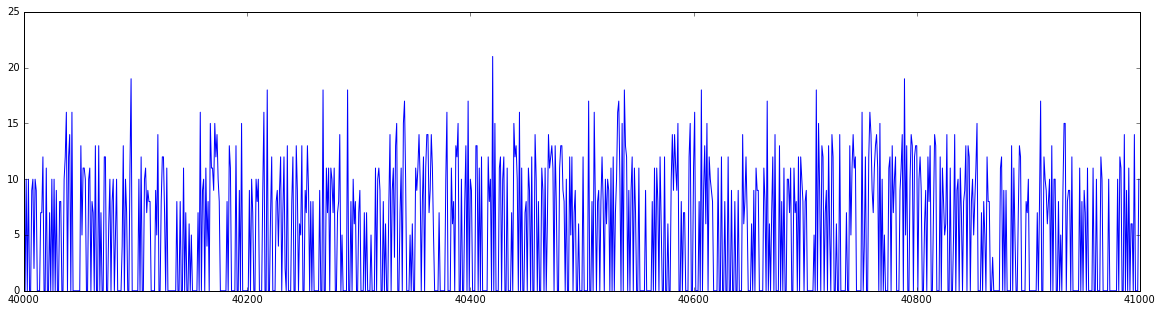

In [334]:
pylab.rcParams['figure.figsize'] = (20, 5)
ticks = range(40000, 41000)
# ticks = range(len(x))
plt.plot(ticks, x[ticks])

## 1.1 Fit a IPP model

In [335]:
model = MMPP(n_components=2, n_iter=1, init_params='', verbose=False)
model.startprob_ = np.array([.5, .5])
model.transmat_ = np.array([[0.5, 0.5], [0.5, 0.5]])
model.emissionrates_ = np.array([1.0, 0.0])

In [336]:
print 'Start: ',
print model.startprob_
print 'Transitions: '
print model.transmat_
print 'Emission: ',
print model.emissionrates_

Start:  [ 0.5  0.5]
Transitions: 
[[ 0.5  0.5]
 [ 0.5  0.5]]
Emission:  [ 1.  0.]


In [337]:
def adjust(model, epsilon):
    model.startprob_ += epsilon
    model.transmat_ += epsilon
    model.emissionrates_[0] += epsilon
    # model.emissionrates_[1] += epsilon  # when the model is general MMPP
    model.emissionrates_[1] = 0.0  # when the model is IPP
    normalize(model.startprob_)
    normalize(model.transmat_, axis=1)     

In [338]:
stride = 1
total_steps = 2000
window_size = 200
epsilon = 1e-22
offset = 0
n_iter = 1

prob0 = np.zeros(total_steps)
trans00 = np.zeros(total_steps)
trans11 = np.zeros(total_steps)
rate0 = np.zeros(total_steps)
rate1 = np.zeros(total_steps)
score = np.zeros(total_steps)
score_exp = np.zeros(total_steps)

for i in range(total_steps):
    x_window = x[(offset+i*stride):(offset+i*stride+window_size), None]
    for _ in range(n_iter):
        model.fit(x_window)
        adjust(model, epsilon)
    prob0[i] = model.startprob_[0]
    rate0[i] = model.emissionrates_[0]
    rate1[i] = model.emissionrates_[1]
    trans00[i] = model.transmat_[0, 0]
    trans11[i] = model.transmat_[1, 1]
    # adjust(model, epsilon)
    score[i] = model.score(x_window)/window_size
    score_exp[i] = model.score(model.sample(100)[0])/100
    if i%100 == 0:
        print i,
        print model.startprob_,
        print model.transmat_,
        print model.emissionrates_,
        print score[i],
        print score_exp[i]
print

0 [ 0.26894142  0.73105858] [[ 0.66415755  0.33584245]
 [ 0.62685552  0.37314448]] [ 8.0733823  0.       ] -2.15688620064 -2.01973362814
100 [  1.00000000e+00   2.89172000e-18] [[ 0.51888612  0.48111388]
 [ 0.54840999  0.45159001]] [ 10.027929   0.      ] -2.08453276665 -2.01971966226
200 [  1.00000000e+00   1.00000000e-22] [[ 0.50002157  0.49997843]
 [ 0.47526701  0.52473299]] [ 9.98937338  0.        ] -1.89988645465 -1.85523332991
300 [  1.00000000e+00   1.00000000e-22] [[ 0.4831659   0.5168341 ]
 [ 0.40910396  0.59089604]] [ 10.19061878   0.        ] -1.79380951175 -1.61895837933
400 [  9.99999996e-01   4.41423480e-09] [[ 0.50001441  0.49998559]
 [ 0.47526142  0.52473858]] [ 10.31602578   0.        ] -1.96372913369 -1.84155138461
500 [  1.00000000e+00   1.00000000e-22] [[ 0.50945135  0.49054865]
 [ 0.54840765  0.45159235]] [ 10.39587594   0.        ] -2.01230563239 -2.25513506664
600 [  1.00000000e+00   7.37787356e-14] [[ 0.50487358  0.49512642]
 [ 0.53126972  0.46873028]] [ 10.2617

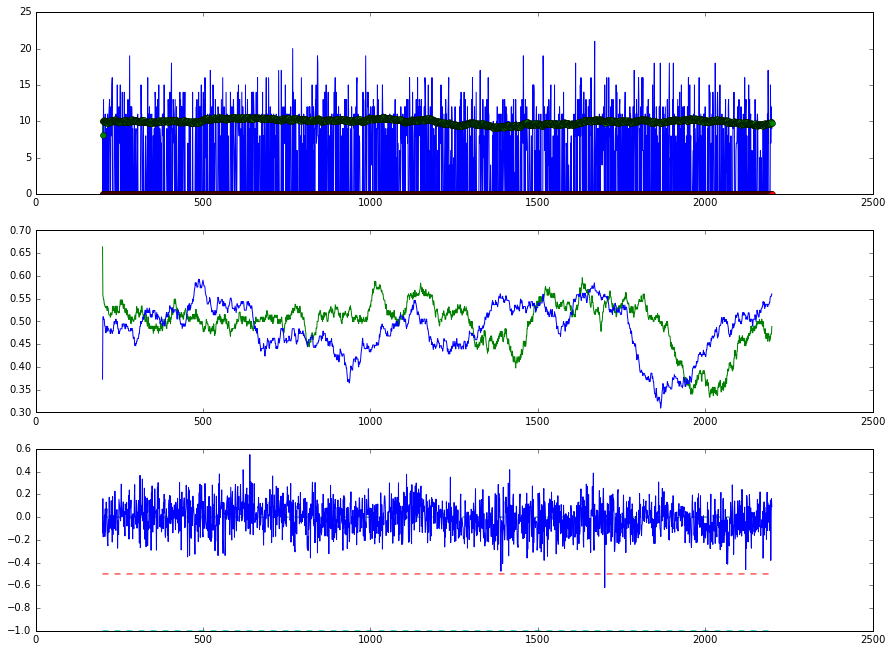

In [339]:
pylab.rcParams['figure.figsize'] = (15, 15)
N_plots = 4
ticks = range((offset+window_size), (offset+(total_steps-1)*stride+window_size+1), stride)
plt.subplots()
plt.subplot(N_plots,1,1)
plt.plot(ticks, x[ticks])
plt.plot(ticks, rate0, 'g-o')
plt.plot(ticks, rate1, 'r-o')
plt.subplot(N_plots,1,2)
# plt.plot(ticks, prob0, 'r')
plt.plot(ticks, trans00, 'g')
plt.plot(ticks, trans11, 'b')
plt.subplot(N_plots,1,3)
plt.plot(ticks, score-score, 'g--')
plt.plot(ticks, score-score-0.5, 'r--')
plt.plot(ticks, score-score-1.0, 'c--')
plt.plot(ticks, score-score_exp, 'b')

## 1.2 Fit a Poisson Model

In [50]:
model = MMPP(n_components=1, n_iter=1, init_params='', verbose=False)
model.startprob_ = np.array([1.0])
model.transmat_ = np.array([[1.0]])
model.emissionrates_ = np.array([1.0])

In [51]:
def adjust(model, epsilon):
    model.startprob_ += epsilon
    model.transmat_ += epsilon
    model.emissionrates_[0] += epsilon
    normalize(model.startprob_)
    normalize(model.transmat_, axis=1)     

In [52]:
stride = 1
total_steps = 2000
window_size = 30
epsilon = 1e-4
offset = 2000
n_iter = 2

prob0 = np.zeros(total_steps)
trans00 = np.zeros(total_steps)
trans11 = np.zeros(total_steps)
rate = np.zeros(total_steps)
score = np.zeros(total_steps)
score_exp = np.zeros(total_steps)

for i in range(total_steps):
    x_window = x[(offset+i*stride):(offset+i*stride+window_size), None]
    for _ in range(n_iter):
        model.fit(x_window)
        adjust(model, epsilon)
    rate[i] = model.emissionrates_[0]
    # adjust(model, epsilon)
    score[i] = model.score(x_window)/window_size
    score_exp[i] = model.score(model.sample(100)[0])/100
    if i%100 == 0:
        print i,
        # print model.startprob_,
        # print model.transmat_,
        print model.emissionrates_,
        print score[i]
print

0 [ 10.17251379] -3.0155621078
100 [ 3.27596207] -2.21126236957
200 [ 2.0001] -1.7210448806
300 [ 5.0001] -2.04570305399
400 [ 4.13803103] -2.21889181659
500 [ 0.5863069] -1.07762232949
600 [ 0.27596207] -0.642398136049
700 [ 1.03458276] -1.38162726081
800 [ 0.44837586] -0.842172489648
900 [ 0.13803103] -0.402067932023
1000 [ 0.10354828] -0.330320010019
1100 [ 0.0001] -0.0001
1200 [ 0.0001] -0.0001
1300 [ 0.0001] -0.0001
1400 [ 0.03458276] -0.146729426183
1500 [ 0.93113448] -1.20329504303
1600 [ 0.37941034] -0.804075279926
1700 [ 0.13803103] -0.402067932023
1800 [ 0.17251379] -0.465393474051
1900 [ 0.20699655] -0.545112086581



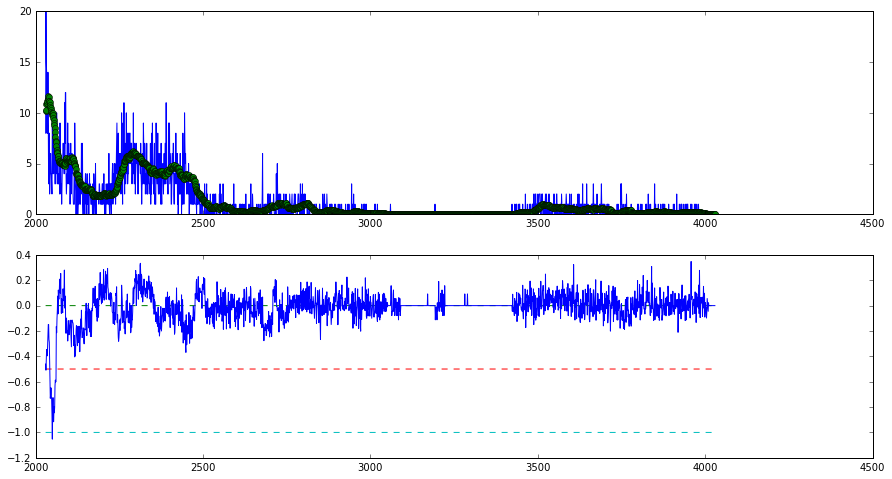

In [54]:
pylab.rcParams['figure.figsize'] = (15, 8)
N_plots = 2
ticks = range((offset+window_size), (offset+(total_steps-1)*stride+window_size+1), stride)
plt.subplots()
plt.subplot(N_plots,1,1)
plt.plot(ticks, x[ticks])
plt.plot(ticks, rate, 'g-o')
plt.subplot(N_plots,1,2)
plt.plot(ticks, score-score, 'g--')
plt.plot(ticks, score-score-0.5, 'r--')
plt.plot(ticks, score-score-1.0, 'c--')
plt.plot(ticks, score-score_exp, 'b')